# Automobile Sales Exploratory Data Analysis

Using Kaggle Dataset: https://www.kaggle.com/datasets/ddosad/auto-sales-data

In [71]:
!gdown 1E6Ft3dK9BlRzfcvSEsVYQIo4Wj4MjRIw

Downloading...
From: https://drive.google.com/uc?id=1E6Ft3dK9BlRzfcvSEsVYQIo4Wj4MjRIw
To: /content/Auto Sales data.csv
100% 474k/474k [00:00<00:00, 83.1MB/s]


In [72]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px

from warnings import filterwarnings
filterwarnings('ignore')

In [73]:
df = pd.read_csv('/content/Auto Sales data.csv', parse_dates=['ORDERDATE'], dayfirst=True)
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2018-02-24,828,Shipped,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,10022,USA,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,2018-05-07,757,Shipped,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,51100,France,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,2018-07-01,703,Shipped,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,75508,France,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,2018-08-25,649,Shipped,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,90003,USA,Young,Julie,Medium
4,10168,36,96.66,1,3479.76,2018-10-28,586,Shipped,Motorcycles,95,S10_1678,Technics Stores Inc.,6505556809,9408 Furth Circle,Burlingame,94217,USA,Hirano,Juri,Medium


In [74]:
df.shape

(2747, 20)

We want to  drop days since last order & create a new feature having time difference as : DateLast order - 06-01-2020

In [75]:
# Create a new feature 'DAYS_SINCE_LASTORDER' based on the time difference
# Drop the 'DAYS_SINCE_LASTORDER' column
df = df.drop('DAYS_SINCE_LASTORDER', axis=1)

# Create a new feature 'DAYS_SINCE_LASTORDER' based on the time difference
from datetime import datetime

temp_date = datetime(2020, 6, 1)  # Define the specific date
df['DAYS_SINCE_LASTORDER'] = (temp_date- df['ORDERDATE']).dt.days

In [76]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE,DAYS_SINCE_LASTORDER
0,10107,30,95.70,2,2871.00,2018-02-24,Shipped,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,10022,USA,Yu,Kwai,Small,828
1,10121,34,81.35,5,2765.90,2018-05-07,Shipped,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,51100,France,Henriot,Paul,Small,756
2,10134,41,94.74,2,3884.34,2018-07-01,Shipped,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,75508,France,Da Cunha,Daniel,Medium,701
3,10145,45,83.26,6,3746.70,2018-08-25,Shipped,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,90003,USA,Young,Julie,Medium,646
4,10168,36,96.66,1,3479.76,2018-10-28,Shipped,Motorcycles,95,S10_1678,Technics Stores Inc.,6505556809,9408 Furth Circle,Burlingame,94217,USA,Hirano,Juri,Medium,582


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747 entries, 0 to 2746
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ORDERNUMBER           2747 non-null   int64         
 1   QUANTITYORDERED       2747 non-null   int64         
 2   PRICEEACH             2747 non-null   float64       
 3   ORDERLINENUMBER       2747 non-null   int64         
 4   SALES                 2747 non-null   float64       
 5   ORDERDATE             2747 non-null   datetime64[ns]
 6   STATUS                2747 non-null   object        
 7   PRODUCTLINE           2747 non-null   object        
 8   MSRP                  2747 non-null   int64         
 9   PRODUCTCODE           2747 non-null   object        
 10  CUSTOMERNAME          2747 non-null   object        
 11  PHONE                 2747 non-null   object        
 12  ADDRESSLINE1          2747 non-null   object        
 13  CITY              

### Numerical Features

We will drop ORDERNUMBER cuz it's not relevant for EDA.

In [78]:
df_num = df.select_dtypes(include=['float64', 'int64']).drop(columns=['ORDERNUMBER'])
print(df_num.columns, len(list(df_num.columns.values)))

Index(['QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER', 'SALES', 'MSRP',
       'DAYS_SINCE_LASTORDER'],
      dtype='object') 6


In [79]:
df_num.head()

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,MSRP,DAYS_SINCE_LASTORDER
0,30,95.70,2,2871.00,95,828
1,34,81.35,5,2765.90,95,756
2,41,94.74,2,3884.34,95,701
3,45,83.26,6,3746.70,95,646
4,36,96.66,1,3479.76,95,582


### Categorical Features

We will drop 'PHONE','ADDRESSLINE1', 'CONTACTLASTNAME','CONTACTFIRSTNAME' cuz we don't need to plot them.

In [80]:
df_cat = df.select_dtypes(include=['object']).drop(columns=[
    'PHONE','ADDRESSLINE1', 'CONTACTLASTNAME','CONTACTFIRSTNAME'])
print(df_cat.columns, len(list(df_cat.columns.values)))

Index(['STATUS', 'PRODUCTLINE', 'PRODUCTCODE', 'CUSTOMERNAME', 'CITY',
       'POSTALCODE', 'COUNTRY', 'DEALSIZE'],
      dtype='object') 8


In [81]:
df_cat.head()

,STATUS,PRODUCTLINE,PRODUCTCODE,CUSTOMERNAME,CITY,POSTALCODE,COUNTRY,DEALSIZE
0,Shipped,Motorcycles,S10_1678,Land of Toys Inc.,NYC,10022,USA,Small
1,Shipped,Motorcycles,S10_1678,Reims Collectables,Reims,51100,France,Small
2,Shipped,Motorcycles,S10_1678,Lyon Souveniers,Paris,75508,France,Medium
3,Shipped,Motorcycles,S10_1678,Toys4GrownUps.com,Pasadena,90003,USA,Medium
4,Shipped,Motorcycles,S10_1678,Technics Stores Inc.,Burlingame,94217,USA,Medium


## Descriptive Summary

### Numeric features

In [82]:
display(round(df_num.describe(),2).T)

,count,mean,std,min,25%,50%,75%,max
QUANTITYORDERED,2747.0,35.10,9.76,6.00,27.00,35.00,43.00,97.00
PRICEEACH,2747.0,101.10,42.04,26.88,68.74,95.55,127.10,252.87
ORDERLINENUMBER,2747.0,6.49,4.23,1.00,3.00,6.00,9.00,18.00
SALES,2747.0,3553.05,1838.95,482.13,2204.35,3184.80,4503.09,14082.80
MSRP,2747.0,100.69,40.11,33.00,68.00,99.00,124.00,214.00
DAYS_SINCE_LASTORDER,2747.0,384.09,230.23,1.00,197.00,343.00,571.00,877.00


### Categorical features

In [83]:
df_cat.describe().T

,count,unique,top,freq
STATUS,2747,6,Shipped,2541
PRODUCTLINE,2747,7,Classic Cars,949
PRODUCTCODE,2747,109,S18_3232,51
CUSTOMERNAME,2747,89,Euro Shopping Channel,259
CITY,2747,71,Madrid,304
POSTALCODE,2747,73,28034,259
COUNTRY,2747,19,USA,928
DEALSIZE,2747,3,Medium,1349


In [84]:
#@title Checking for Missing Values
df.isnull().sum()

ORDERNUMBER             0
QUANTITYORDERED         0
PRICEEACH               0
ORDERLINENUMBER         0
SALES                   0
ORDERDATE               0
STATUS                  0
PRODUCTLINE             0
MSRP                    0
PRODUCTCODE             0
CUSTOMERNAME            0
PHONE                   0
ADDRESSLINE1            0
CITY                    0
POSTALCODE              0
COUNTRY                 0
CONTACTLASTNAME         0
CONTACTFIRSTNAME        0
DEALSIZE                0
DAYS_SINCE_LASTORDER    0
dtype: int64

In [85]:
#@title Checking for Duplicate Values
df.duplicated().sum()

0

## Univariate Analysis

In [86]:
cat_columns = df[['STATUS', 'PRODUCTLINE', 'DEALSIZE']]

def univariateAnalysis_category(cols):
  print("Distribution of", cols)
  colors = ['#79a5db', '#e0a580', '#6fab90', '#896ca8', '#ADD8E6']
  value_counts = cat_columns[cols].value_counts()

  # Count plot
  fig = px.bar(value_counts, x=value_counts.index,
               y=value_counts.values, title=f'Distributuon of {cols}',
               labels={'x': 'Categories', 'y': 'Count'},
               color_discrete_sequence=[colors])
  fig.update_layout(width=700)
  fig.update_layout(plot_bgcolor='#ffffff', paper_bgcolor='#ffffff')
  fig.show()

  # Donut chart
  percentage = (value_counts / value_counts.sum()) * 100
  fig = px.pie(values=percentage, names=value_counts.index,
               labels={'names': 'Categories', 'values': 'Percentage'},
               hole=0.5, color_discrete_sequence=colors)
  fig.add_annotation(x=0.5, y=0.5, align="center", xref="paper",
                     yref="paper", showarrow=False, font_size=15,
                     text=f'{cols}')
  fig.update_layout(legend=dict(x=0.9, y=0.5))
  fig.update_layout(width=700)
  fig.show()
  print("       ")

for x in cat_columns:
  univariateAnalysis_category(x)


Distribution of STATUS


       
Distribution of PRODUCTLINE


       
Distribution of DEALSIZE


Description of QUANTITYORDERED
----------------------------------------------------------------------------
count    2747.000000
mean       35.103021
std         9.762135
min         6.000000
25%        27.000000
50%        35.000000
75%        43.000000
max        97.000000
Name: QUANTITYORDERED, dtype: float64 ----------------------------------------------------------------------------
----------------------------------------------------------------------------


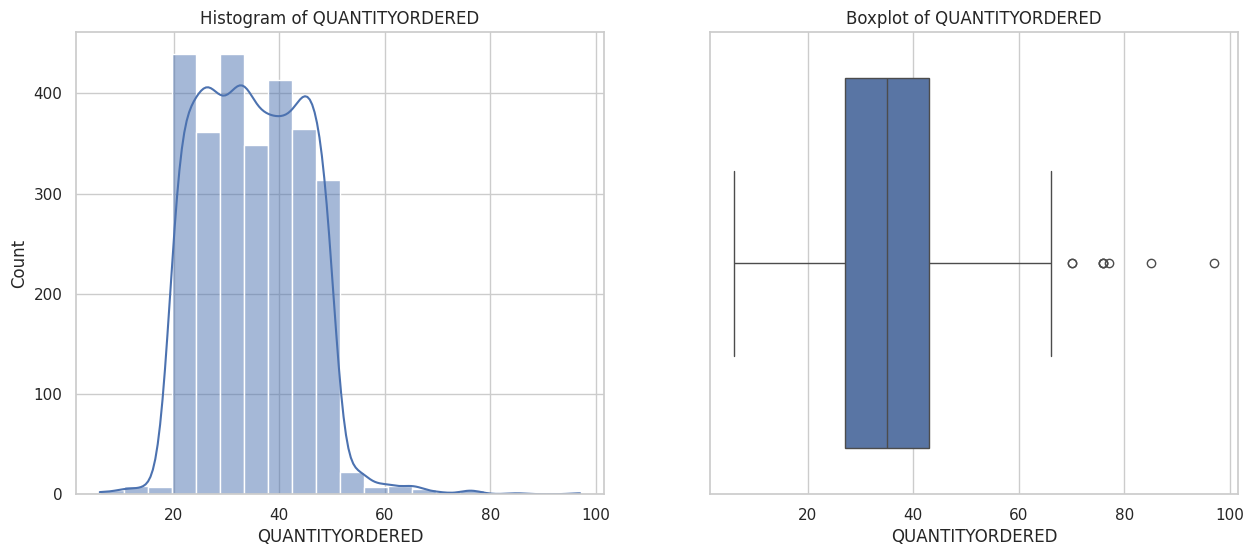

Description of PRICEEACH
----------------------------------------------------------------------------
count    2747.000000
mean      101.098952
std        42.042549
min        26.880000
25%        68.745000
50%        95.550000
75%       127.100000
max       252.870000
Name: PRICEEACH, dtype: float64 ----------------------------------------------------------------------------
----------------------------------------------------------------------------


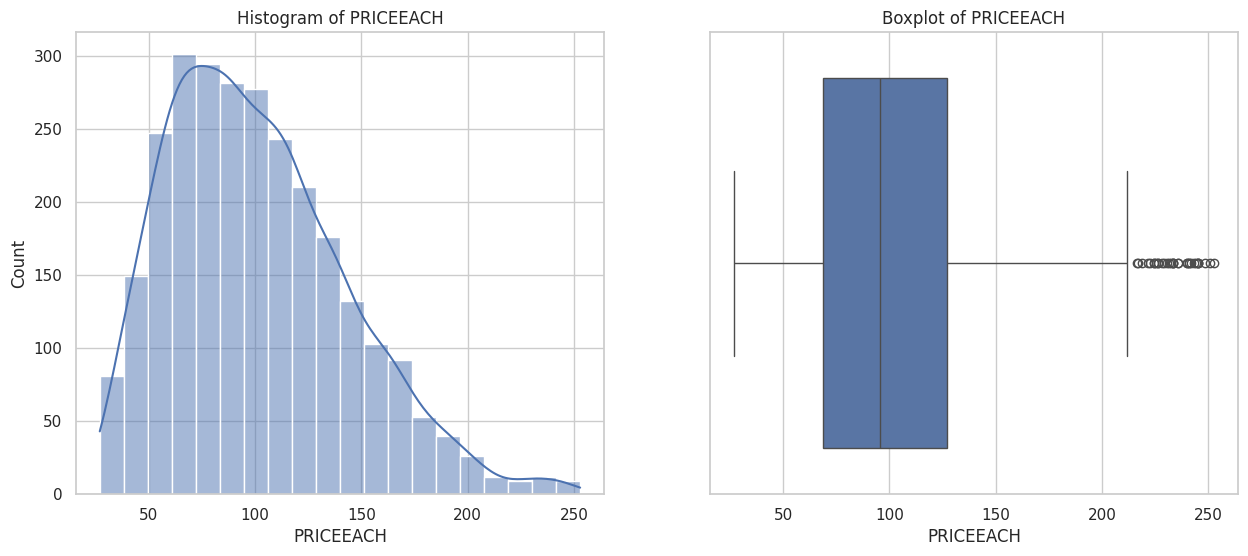

Description of ORDERLINENUMBER
----------------------------------------------------------------------------
count    2747.000000
mean        6.491081
std         4.230544
min         1.000000
25%         3.000000
50%         6.000000
75%         9.000000
max        18.000000
Name: ORDERLINENUMBER, dtype: float64 ----------------------------------------------------------------------------
----------------------------------------------------------------------------


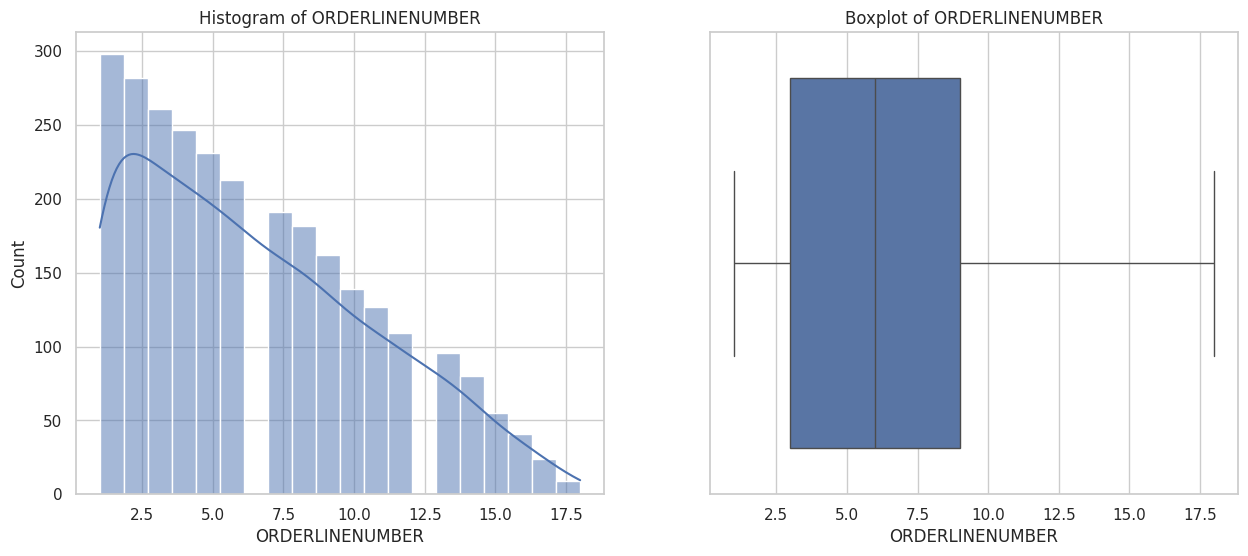

Description of SALES
----------------------------------------------------------------------------
count     2747.000000
mean      3553.047583
std       1838.953901
min        482.130000
25%       2204.350000
50%       3184.800000
75%       4503.095000
max      14082.800000
Name: SALES, dtype: float64 ----------------------------------------------------------------------------
----------------------------------------------------------------------------


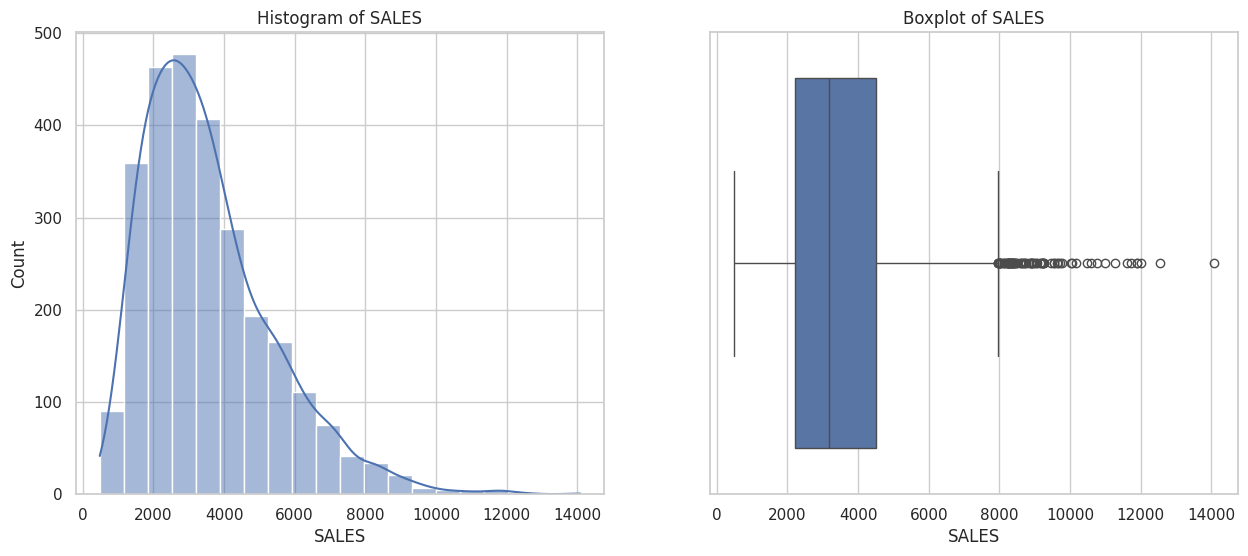

Description of MSRP
----------------------------------------------------------------------------
count    2747.000000
mean      100.691664
std        40.114802
min        33.000000
25%        68.000000
50%        99.000000
75%       124.000000
max       214.000000
Name: MSRP, dtype: float64 ----------------------------------------------------------------------------
----------------------------------------------------------------------------


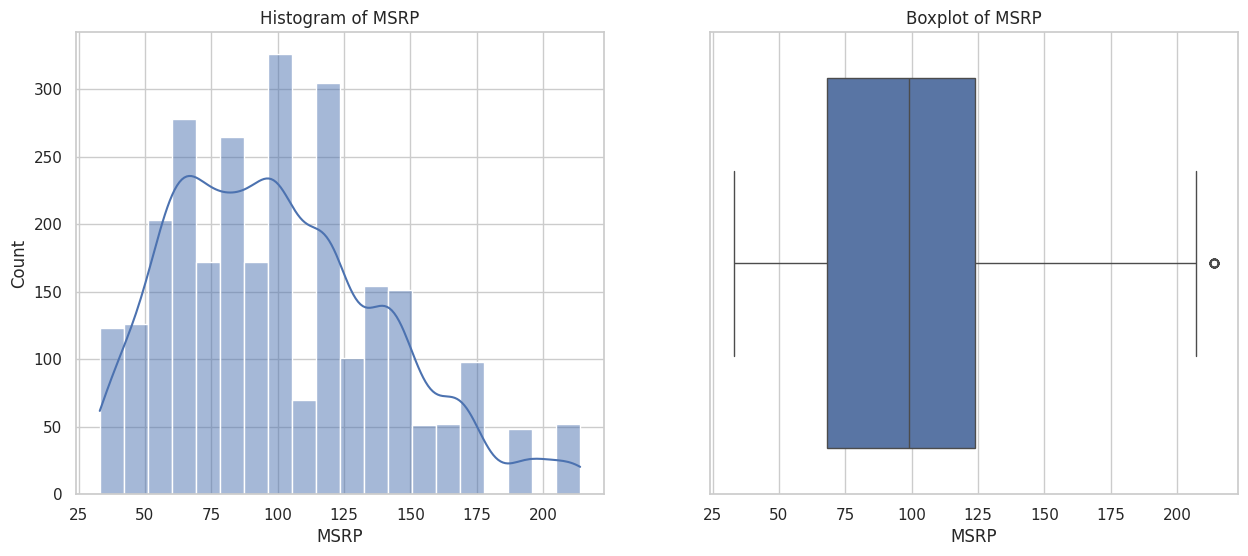

Description of DAYS_SINCE_LASTORDER
----------------------------------------------------------------------------
count    2747.000000
mean      384.085912
std       230.231295
min         1.000000
25%       197.000000
50%       343.000000
75%       571.000000
max       877.000000
Name: DAYS_SINCE_LASTORDER, dtype: float64 ----------------------------------------------------------------------------
----------------------------------------------------------------------------


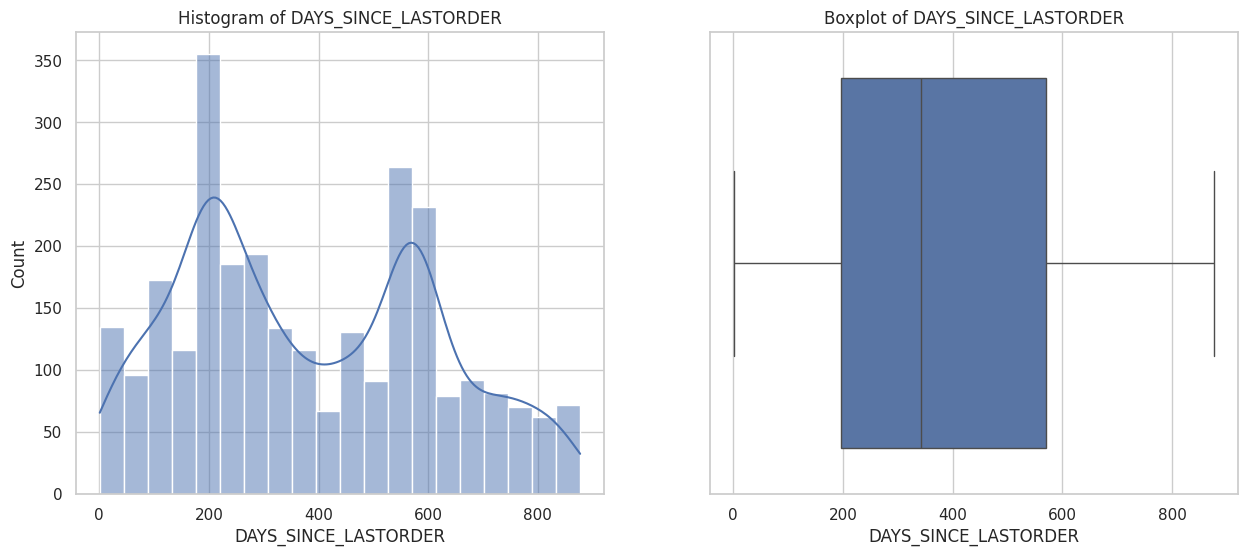

In [87]:
def univariateAnalysis_numeric(column, nbins):
  print("Description of", column)
  print("----------------------------------------------------------------------------")
  print(df[column].describe(), end=' ')
  fig, axes = plt.subplots(1, 2, figsize=(15, 6))

  # Plot histogram
  print("----------------------------------------------------------------------------")
  sns.histplot(df[column], bins=nbins, kde=True, ax=axes[0])
  axes[0].set_title("Histogram of "+ column)

  # Plot violin plot
  print("----------------------------------------------------------------------------")
  sns.boxplot(x=df[column], ax=axes[1])
  axes[1].set_title("Boxplot of "+ column)
  plt.show()

for x in df_num:
  univariateAnalysis_numeric(x, 20)


In [88]:
# Top 10 Countries
country_counts = df['COUNTRY'].value_counts()[:10]
fig = go.Figure(go.Funnel(y=country_counts.index,
                          x=country_counts.values, textinfo='value',
                          marker={'color': px.colors.sequential.Blues_r}))
fig.update_layout(title_text='Top 10 Country Distribution',
                  template='plotly_white')
fig.show()

In [89]:
# Top Cities
city_counts = df['CITY'].value_counts()[:10]
fig = go.Figure(go.Funnel(y=city_counts.index,
                          x=city_counts.values, textinfo='value',
                          marker={'color': px.colors.sequential.Blues_r}))
fig.update_layout(title_text='Top 10 City Distributuon', template='plotly_white')
fig.show()

In [90]:
# Top 10 Customer
top10customer = df.sort_values(by="SALES", ascending=False).head(5)
top10customer = df['CUSTOMERNAME'].value_counts()[:10]
fig = go.Figure(go.Funnel(  y=top10customer.index, x=top10customer.values,
    textinfo='value', marker={'color': px.colors.sequential.Blues_r}))
fig.update_layout(title_text='Top 10 Customer Distribution', template='plotly_white')
fig.show()

## Bivariate Analysis

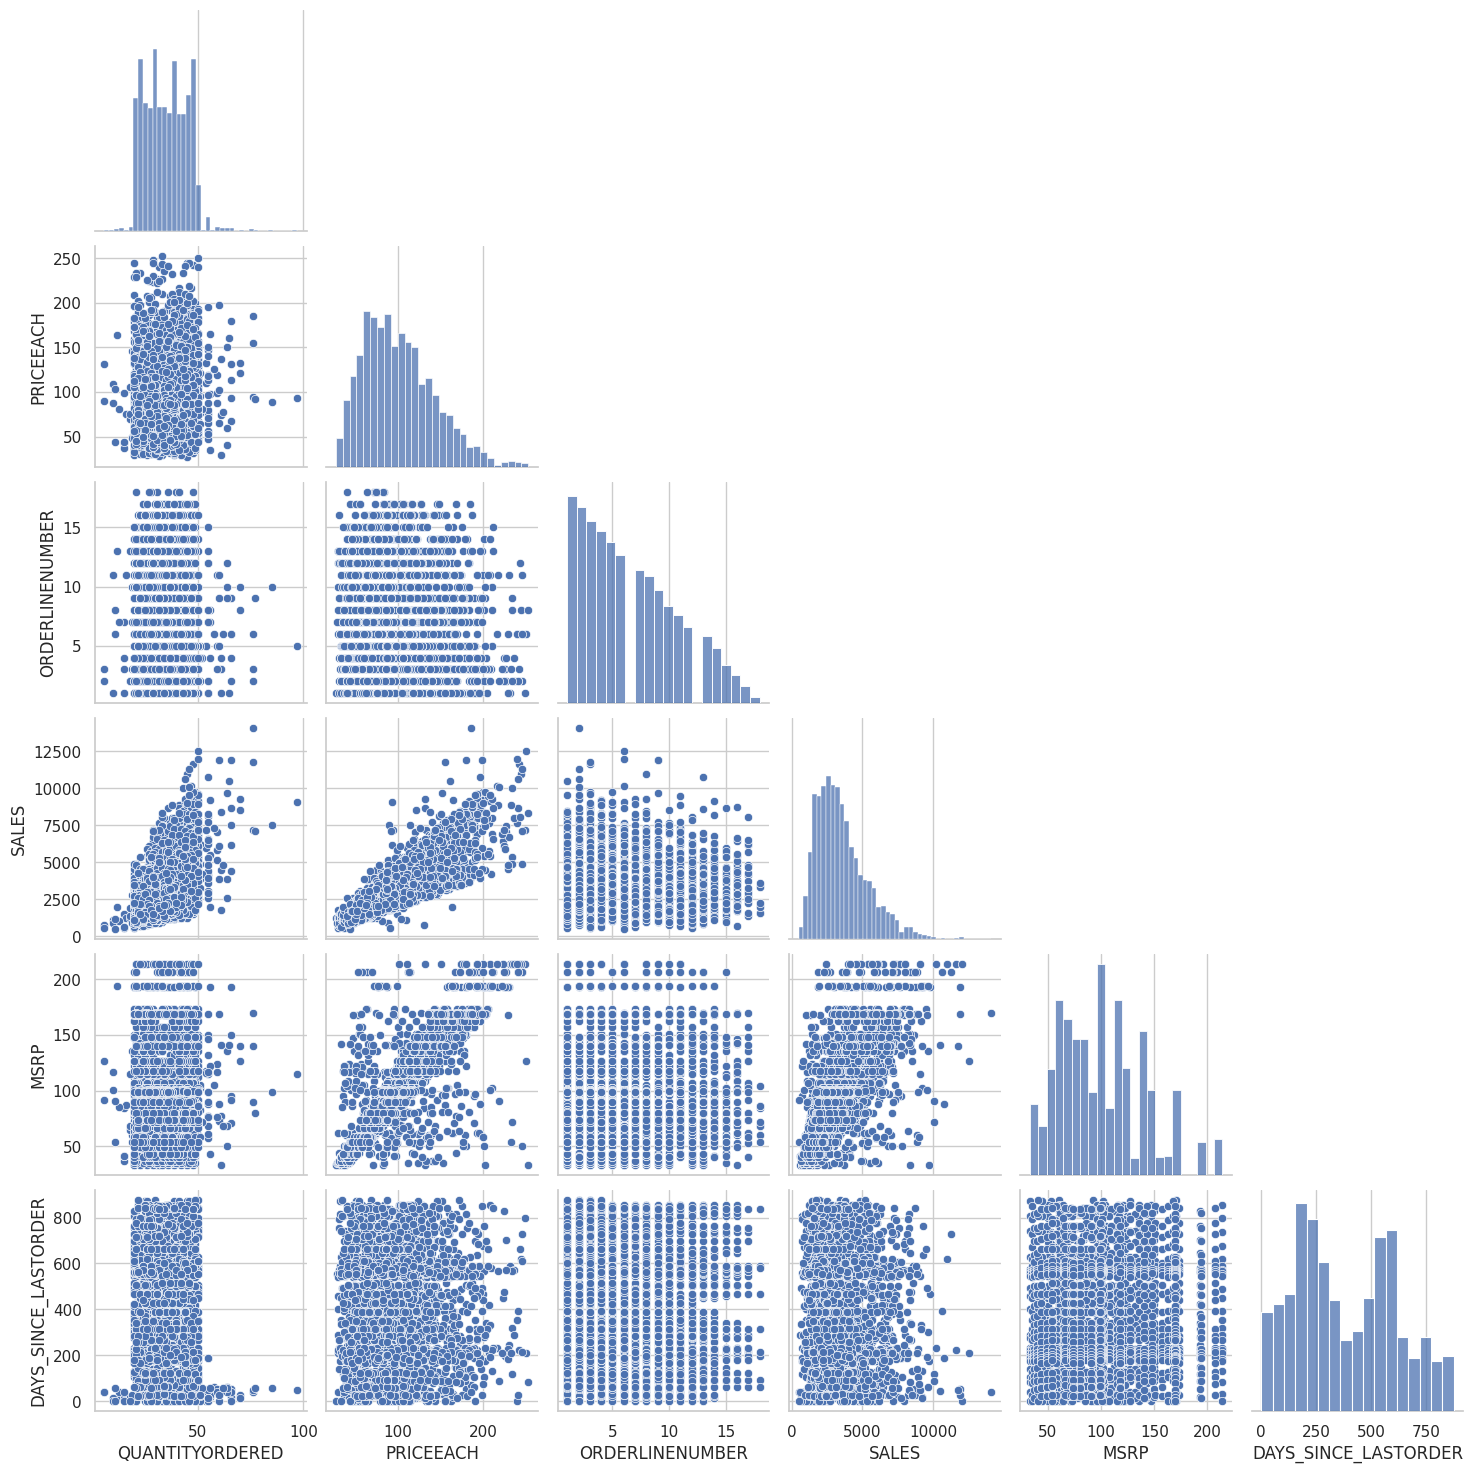

In [91]:
sns.pairplot(data=df_num, corner=True)

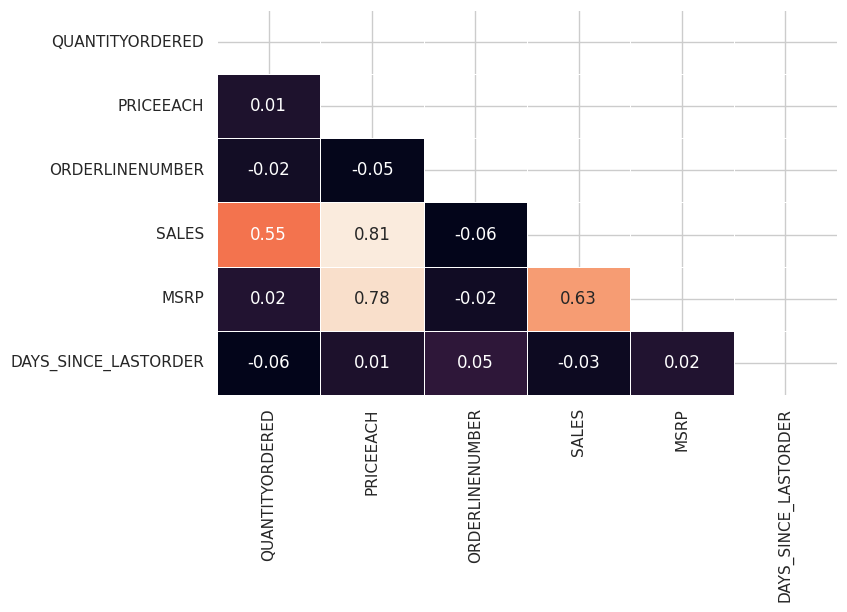

In [92]:
corr = df_num.corr(method='pearson')
mask = np.triu(np.ones_like(corr))
fig = plt.subplots(figsize=(8, 5))
sns.heatmap(corr, annot=True, fmt='.2f', mask=mask,
            cbar=None, linewidth=0.5)
plt.show()

From the correlation matrix we know that:
1. **Quantity Ordered and Sales** have an association. This means that when the quantity ordered increases, the sales also tend to increase.
2. **Price and Sales** have a strong correlation. Specifically, when the price of an item (PRICEEACH) increases, the sales also tend to increase.
3. **MSRP and Price** have a strong correlation.  In other words, as the MSRP increases, the price of the item tends to be higher.
4. **MSRP and Sales** have association. This implies that when the MSRP is higher, the sales also tend to be higher.

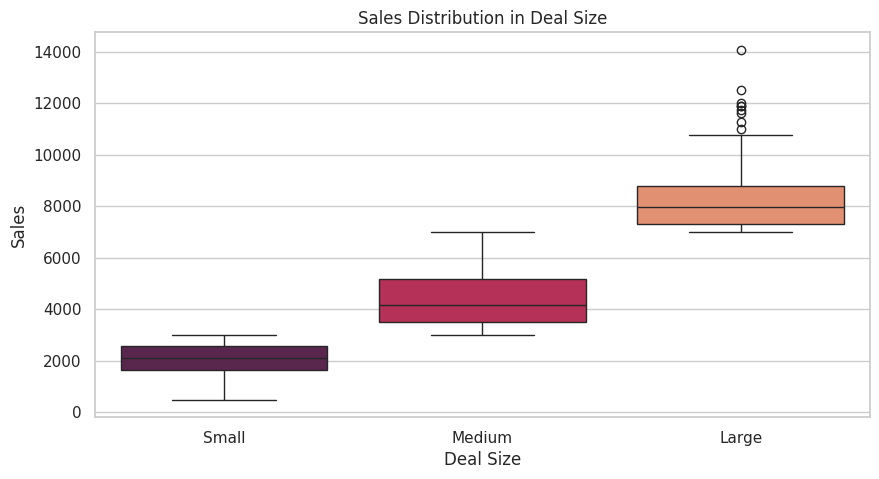

In [93]:
# Sales Distribution in Deal Size
plt.figure(1, figsize=(10, 5))
sns.boxplot(x='DEALSIZE', y='SALES', data=df, palette='rocket')
plt.title('Sales Distribution in Deal Size')
plt.xlabel("Deal Size", fontsize=12)
plt.ylabel("Sales", fontsize=12)
plt.xticks(rotation=0)
plt.show()

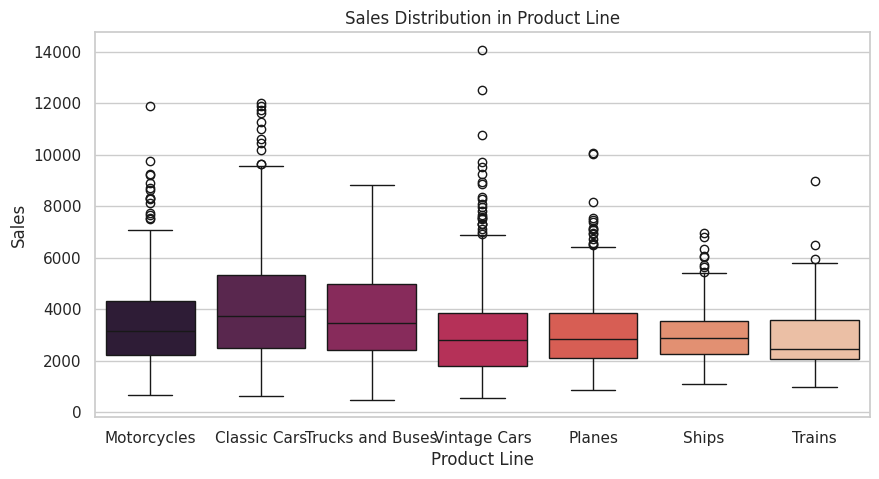

In [94]:
# Sales Distribution in Product Line
plt.figure(1, figsize=(10, 5))
sns.boxplot(x='PRODUCTLINE', y='SALES', data=df, palette='rocket')
plt.title('Sales Distribution in Product Line', fontsize=12)
plt.xlabel("Product Line", fontsize=12)
plt.ylabel("Sales", fontsize=12)
plt.show()

### Yearly, Quarterly, Monthly, Weekly Sales Trend

In [95]:
# Extracy year, month, week, and quarter from ORDERDATE
df['Year'] = df['ORDERDATE'].dt.year
df['Month'] = df['ORDERDATE'].dt.month
df['Week'] = df['ORDERDATE'].dt.isocalendar().week
df['Quarter'] = df['ORDERDATE'].dt.quarter

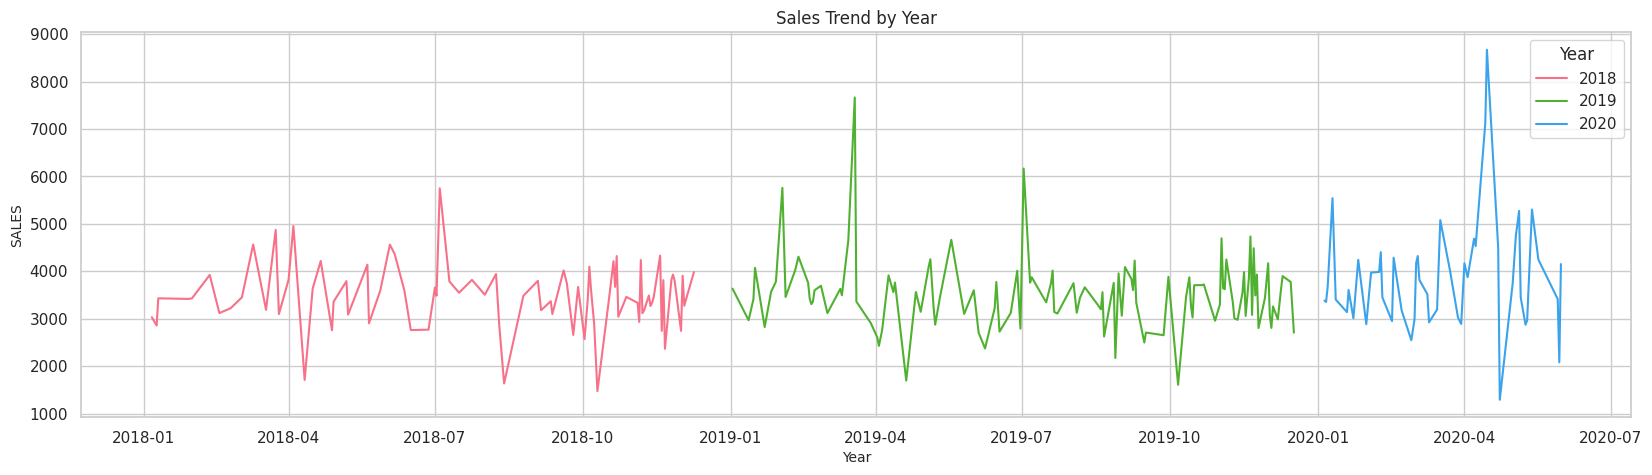

In [96]:
# Sales trend by Year
sns.set(style='whitegrid', rc={"figure.figsize":(20, 5)})
sns.lineplot(data=df, x="ORDERDATE", y="SALES", ci=None,
             hue="Year", palette=sns.color_palette("husl", len(df['Year'].unique())))
plt.title("Sales Trend by Year")
plt.xlabel("Year", fontsize=10)
plt.ylabel("SALES", fontsize=10)
plt.legend(title="Year", loc='best')
plt.show()

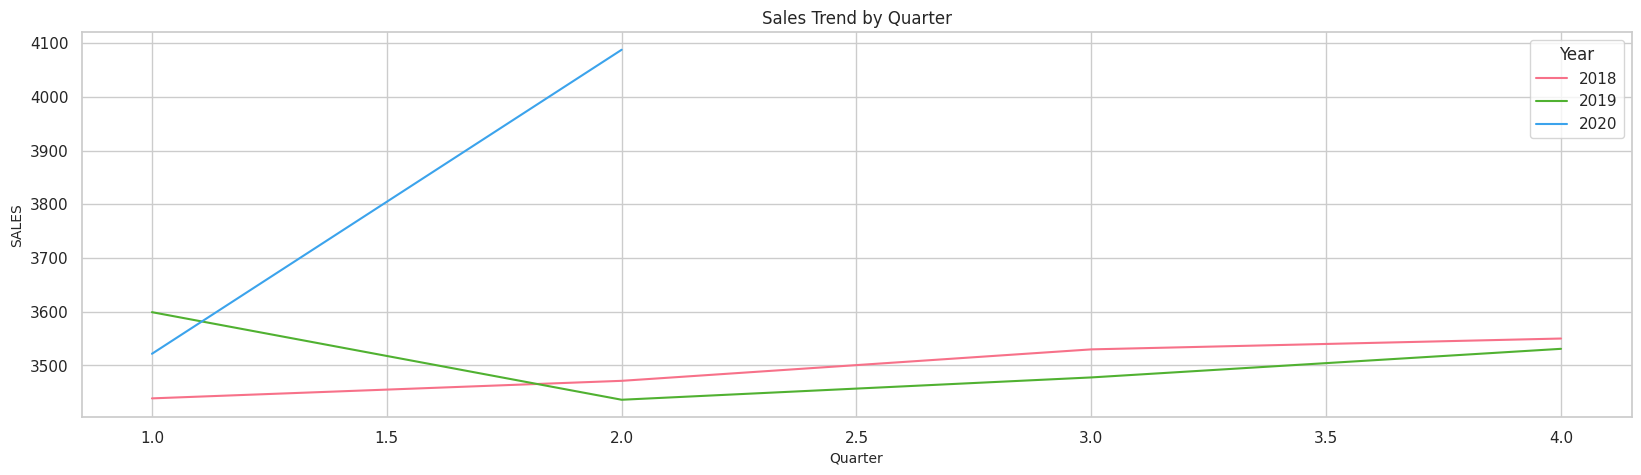

In [97]:
# Sales trend by Quarter
sns.set(style='whitegrid', rc={"figure.figsize":(20, 5)})
sns.lineplot(data=df, x="Quarter", y="SALES", ci=None,
             hue="Year", palette=sns.color_palette("husl", len(df['Year'].unique())))
plt.title("Sales Trend by Quarter")
plt.xlabel("Quarter", fontsize=10)
plt.ylabel("SALES", fontsize=10)
plt.legend(title="Year", loc='best')
plt.show()

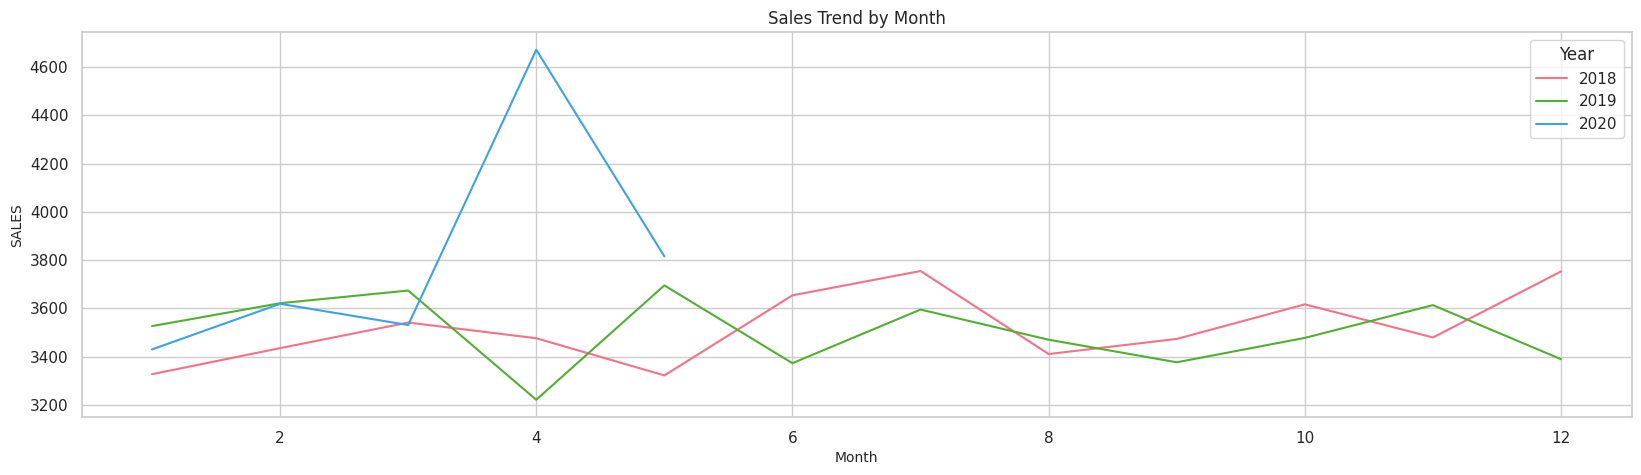

In [98]:
# Sales trend by Month
sns.set(style="whitegrid", rc={"figure.figsize": (20, 5)})
sns.lineplot(data=df, x="Month", y="SALES", ci=None, hue="Year",palette=sns.color_palette("husl", len(df['Year'].unique())))
plt.title("Sales Trend by Month")
plt.xlabel("Month", fontsize=10)
plt.ylabel("SALES", fontsize=10)
plt.legend(title="Year", loc='best')
plt.show()

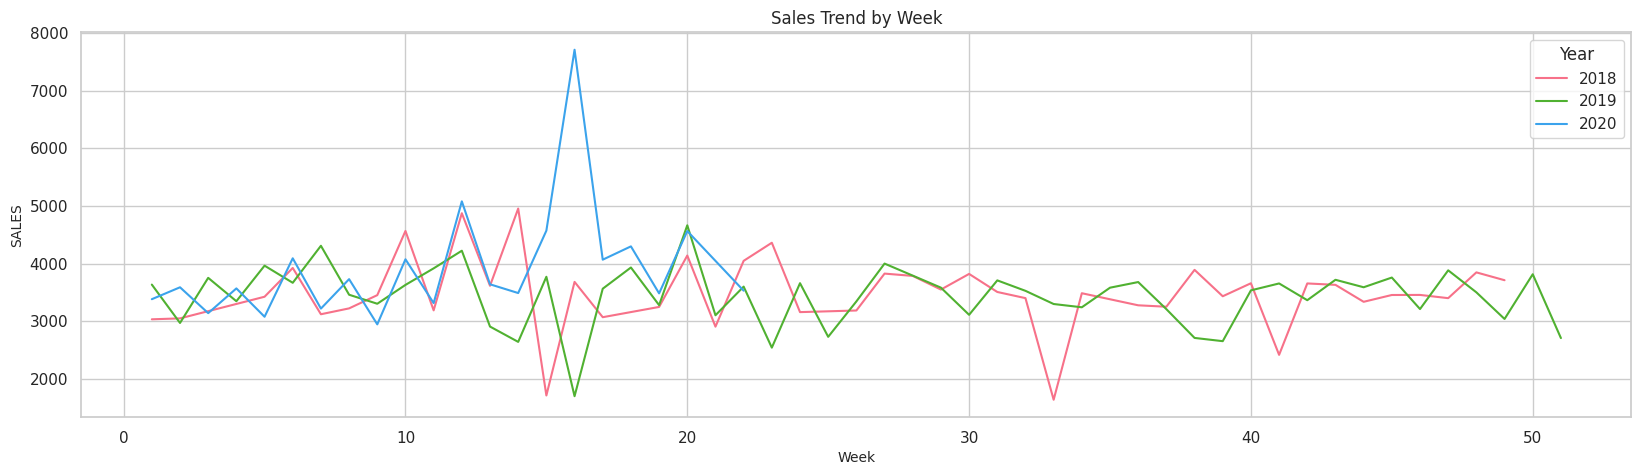

In [99]:
# Sales trend by Week
sns.set(style="whitegrid", rc={"figure.figsize": (20, 5)})
sns.lineplot(data=df, x="Week", y="SALES", ci=None, hue="Year", palette=sns.color_palette("husl", len(df['Year'].unique())))
plt.title("Sales Trend by Week")
plt.xlabel("Week", fontsize=10)
plt.ylabel("SALES", fontsize=10)
plt.legend(title="Year", loc='best')
plt.show()

## Multivariate Analysis

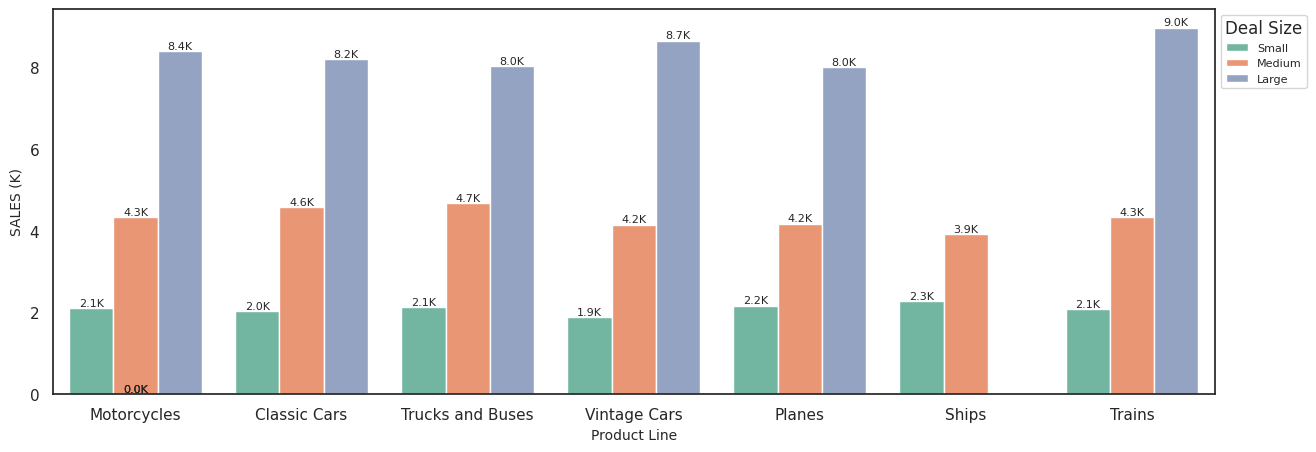

In [100]:
# Comparison between Sales, Product Line along with Dealsize as Hue
sns.set(style="white", rc={"figure.figsize": (15, 5)})
df["SALES (K)"] = df["SALES"] / 1000
sns.barplot(data=df, x="PRODUCTLINE", y="SALES (K)", hue="DEALSIZE", palette="Set2", ci=None)
plt.ylabel("SALES (K)", fontsize=10)
plt.xlabel("Product Line", fontsize=10)
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.1f}K', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', fontsize=8)
plt.legend(title="Deal Size", fontsize=8, loc="upper left", bbox_to_anchor=(1, 1))
plt.show()

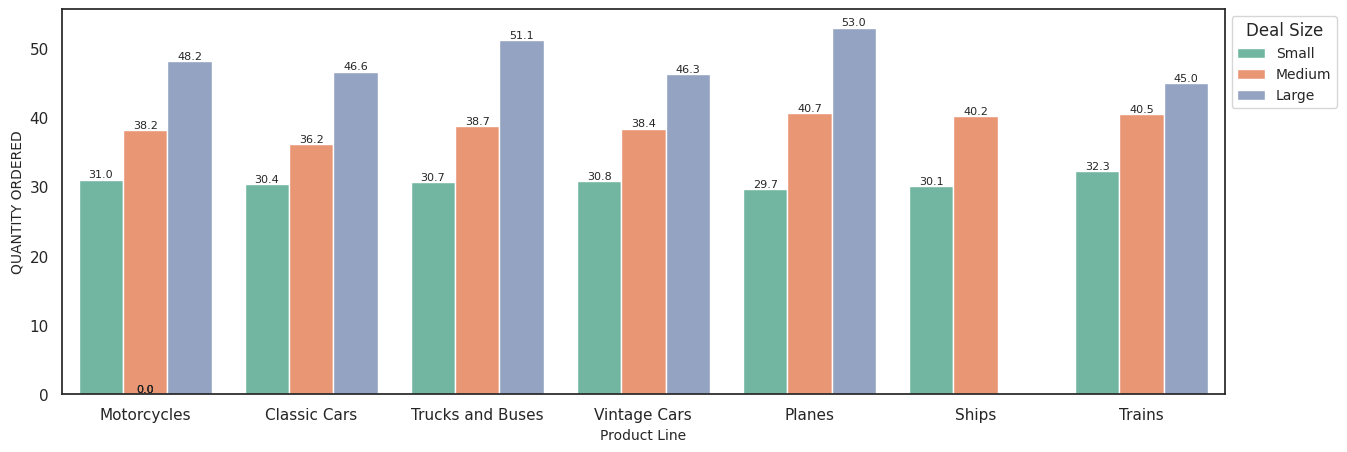

In [101]:
#Comparision between Quantity Ordered, Product Line along with Dealsize as Hue

sns.set(style="white", rc={"figure.figsize": (15, 5)})
sns.barplot(data=df, x="PRODUCTLINE", y="QUANTITYORDERED", hue="DEALSIZE", palette="Set2", ci=None)
plt.ylabel("QUANTITY ORDERED", fontsize=10)
plt.xlabel("Product Line", fontsize=10)
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.1f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom',fontsize=8)
plt.legend(title="Deal Size", fontsize=10, loc="upper left", bbox_to_anchor=(1, 1))
plt.show()

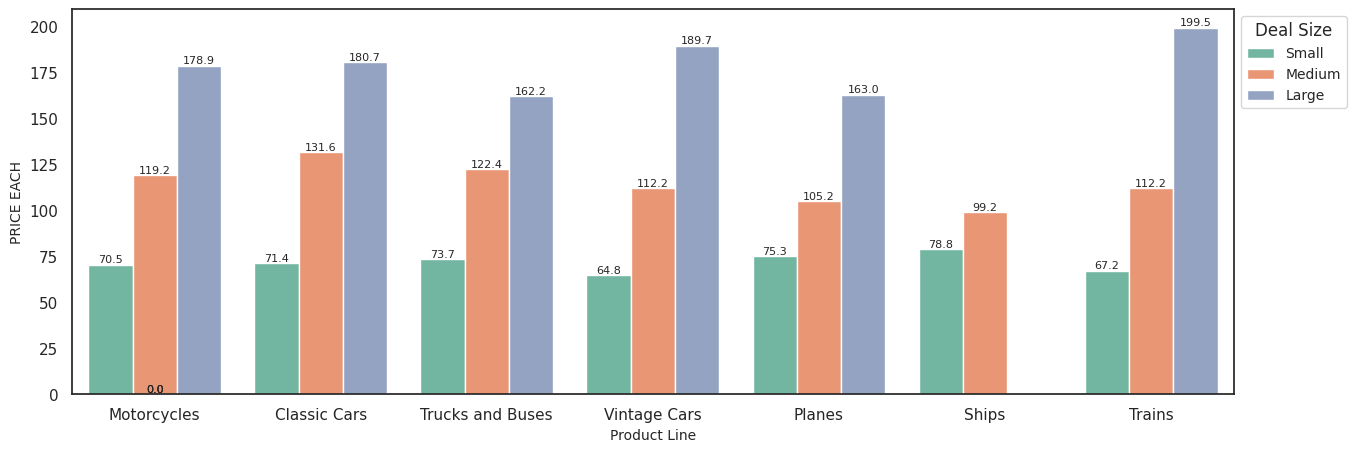

In [102]:
#Comparision between Quantity Ordered, Product Line along with Dealsize as Hue

sns.set(style="white", rc={"figure.figsize": (15, 5)})
sns.barplot(data=df, x="PRODUCTLINE", y="PRICEEACH", hue="DEALSIZE", palette="Set2", ci=None)
plt.ylabel("PRICE EACH", fontsize=10)
plt.xlabel("Product Line", fontsize=10)
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.1f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom',fontsize=8)
plt.legend(title="Deal Size",fontsize=10,  loc="upper left", bbox_to_anchor=(1, 1))
plt.show()

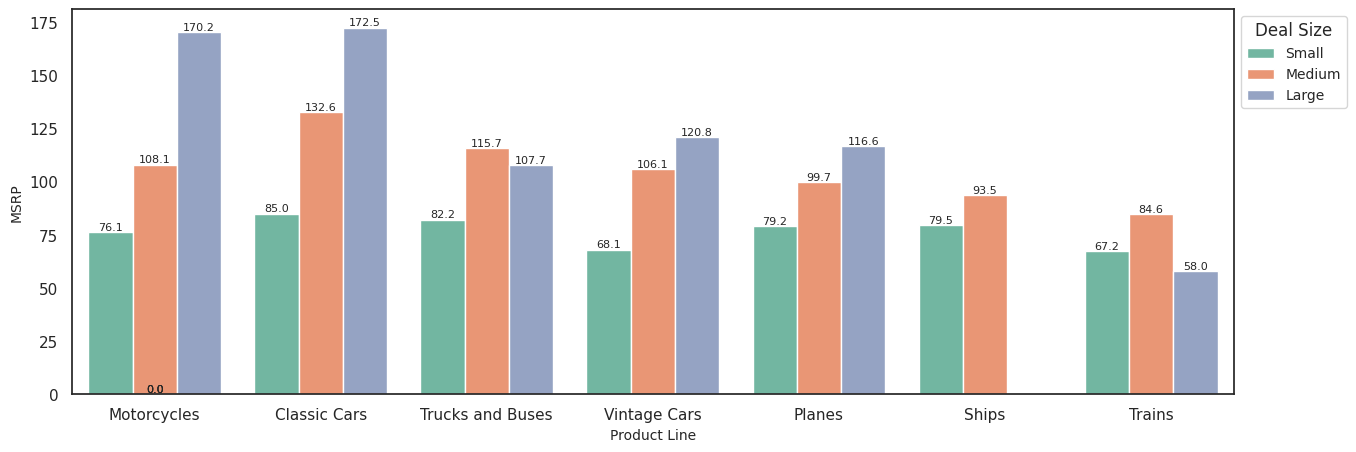

In [103]:
#Comparision between Quantity Ordered, Product Line along with Dealsize as Hue

sns.set(style="white", rc={"figure.figsize": (15, 5)})
sns.barplot(data=df, x="PRODUCTLINE", y="MSRP", hue="DEALSIZE", palette="Set2", ci=None)
plt.ylabel("MSRP", fontsize=10)
plt.xlabel("Product Line", fontsize=10)
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.1f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom',fontsize=8)
plt.legend(title="Deal Size",fontsize=10,  loc="upper left", bbox_to_anchor=(1, 1))
plt.show()

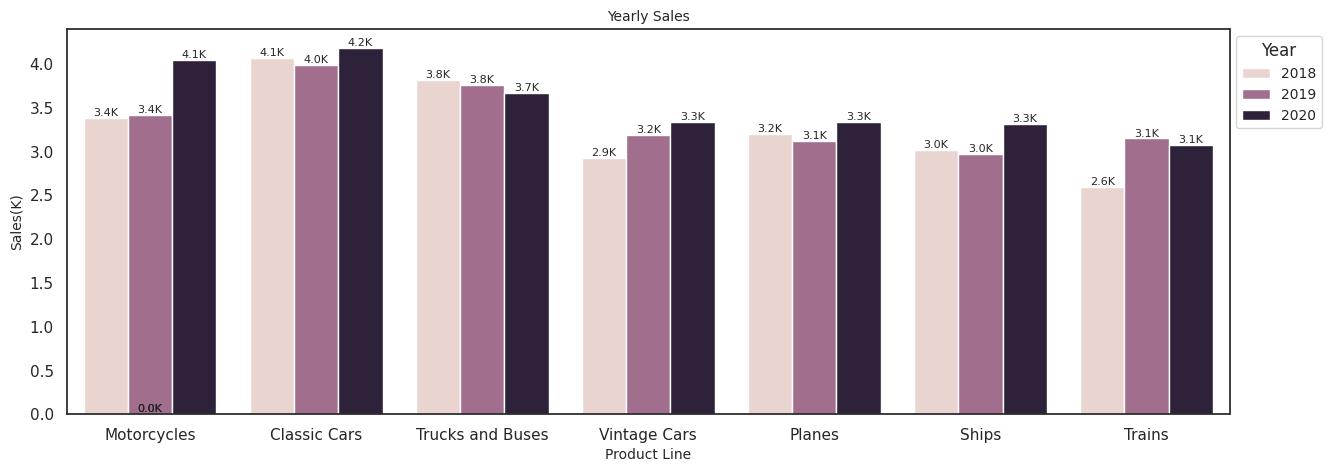

In [104]:
sns.set(style="white", rc={"figure.figsize": (15, 5)})
sns.barplot(data=df, x="PRODUCTLINE", y="SALES (K)", hue="Year",  ci=None)
plt.xlabel("Product Line", fontsize=10)
plt.ylabel("Sales(K)", fontsize=10)
plt.title("Yearly Sales", fontsize=10)
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.1f}K', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom',fontsize=8)
plt.legend(title="Year",fontsize=10,  loc="upper left", bbox_to_anchor=(1, 1))
plt.show()

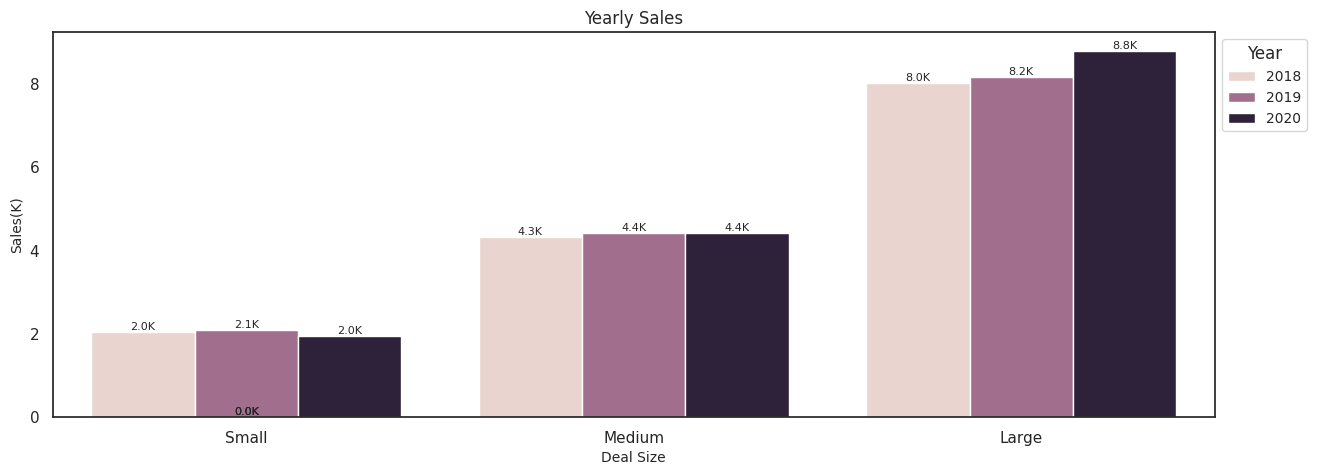

In [105]:
sns.set(style="white", rc={"figure.figsize": (15, 5)})
sns.barplot(data=df, x="DEALSIZE", y="SALES (K)", hue="Year",  ci=None)
plt.xlabel("Deal Size", fontsize=10)
plt.ylabel("Sales(K)", fontsize=10)
plt.title("Yearly Sales", fontsize=12)
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.1f}K', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom',fontsize=8)
plt.legend(title="Year",fontsize=10,  loc="upper left", bbox_to_anchor=(1, 1))
plt.show()

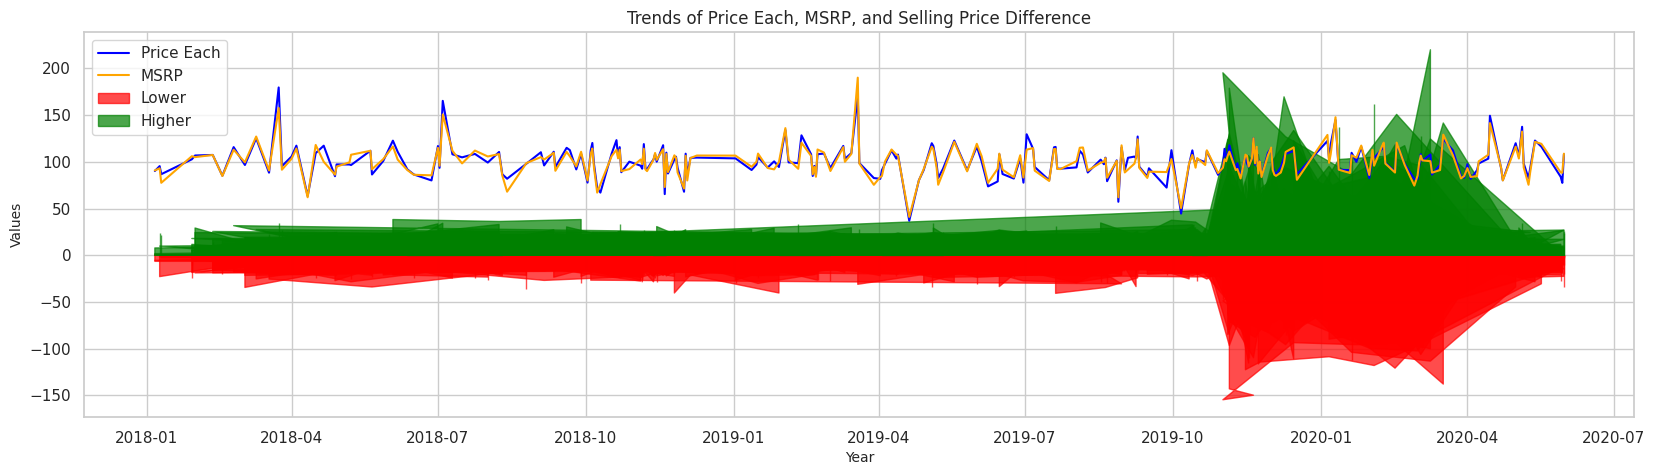

In [106]:
# Trend of Price, MSRP and Selling Price Difference
# Selling Price Difference is calculated as the difference between
# manufactured suggested price (MSRP) and selling price
df ['SELLING_PRICE_DIFF'] = df['PRICEEACH']-df['MSRP']
sns.set(style="whitegrid", rc={"figure.figsize": (20, 5)})
sns.lineplot(data=df, x="ORDERDATE", y="PRICEEACH", ci=None,
             label="Price Each", color='blue')
sns.lineplot(data=df, x="ORDERDATE", y="MSRP", ci=None,
             label="MSRP", color='orange')
plt.fill_between(df['ORDERDATE'], df['SELLING_PRICE_DIFF'],
                 where=(df['SELLING_PRICE_DIFF'] < 0), color="red",
                 alpha=0.7, label="Lower")
plt.fill_between(df["ORDERDATE"], df['SELLING_PRICE_DIFF'],
                 where=(df["SELLING_PRICE_DIFF"] >= 0), color="green",
                 alpha=0.7, label="Higher")
plt.title("Trends of Price Each, MSRP, and Selling Price Difference")
plt.xlabel("Year", fontsize=10)
plt.ylabel("Values", fontsize=10)
plt.legend(loc='best')
plt.show()

## Key Insight from Analysis
1. Sales Overview:

  - In the past 2.5 years, 298 orders were placed by 89 customers from 19 countries.
  - The United States has the highest sales, followed by Spain and France. Notable sales in the Eastern Hemisphere come from Australia and Singapore.
  - Madrid leads in city sales, followed by San Diego and New York City.
  - In the Eastern Hemisphere, sales from Australia and Singapore have decreased, while Japan gained customers in 2019.
  - The US and France saw a significant sales increase in 2019.

2. Product and Revenue:
  - The company makes 109 automobile parts across 7 product lines, priced between $26 and $252.
  - Classic Car parts bring in the most revenue, about 40% of total sales.
  - Parts for Cars, Trucks, Buses, and Motorcycles make up 80% of the company's revenue.

3. Sales Trends:
  - Sales are increasing with seasonal peaks in October and November each year.
  - Early 2020 saw higher sales and customer activity compared to previous years.

4. Concern:
  - No new customers have been added since September 2019.

5. Transaction Characteristics:
  - Most transactions involve 20 to 50 items, typically of medium and small sizes.

6. Key Customers:
  - Euro Shopping Channel and Mini Gifts Distribution Ltd. are the top customers, spending the most and ordering most frequently.

7. Customer Retention:
  - The company had a strong customer retention rate of about 90% in 2019.Sales Overview:
  - In the past 2.5 years, 298 orders were placed by 89 customers from 19 countries.
  - The United States has the highest sales, followed by Spain and France. Notable sales in the Eastern Hemisphere come from Australia and Singapore.
  - Madrid leads in city sales, followed by San Diego and New York City.
  - In the Eastern Hemisphere, sales from Australia and Singapore have decreased, while Japan gained customers in 2019.
  - The US and France saw a significant sales increase in 2019.

8. Product and Revenue:
  - The company makes 109 automobile parts across 7 product lines, priced between $26 and $252.
  - Classic Car parts bring in the most revenue, about 40% of total sales.
  - Parts for Cars, Trucks, Buses, and Motorcycles make up 80% of the company's revenue.

9. Sales Trends:
  - Sales are increasing with seasonal peaks in October and November each year.
  - Early 2020 saw higher sales and customer activity compared to previous years.

10. Concern:
  - No new customers have been added since September 2019.

11. Transaction Characteristics:
  - Most transactions involve 20 to 50 items, typically of medium and small sizes.

12. Key Customers:
  - Euro Shopping Channel and Mini Gifts Distribution Ltd. are the top customers, spending the most and ordering most frequently.

13. Customer Retention:
  - The company had a strong customer retention rate of about 90% in 2019.